In [33]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 2.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [20]:

csv_file_path = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati.csv'
csv_file_path1 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati_ottimizzato.csv'
csv_file_path5 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati_differences_upd2.csv'
csv_file_path7 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati_differences_upd_only_count_ord_final.csv'


df = pd.read_csv(csv_file_path)
df1 = pd.read_csv(csv_file_path1)
df5 = pd.read_csv(csv_file_path5)
df7 = pd.read_csv(csv_file_path7)

print(df)
print(df1)
print(df5)

      File  Iteration  Max_columns  Duration_w_all_Columns  \
0        4          0           11                0.999672   
1        4          1           11                0.889635   
2        4          2           11                0.905284   
3        4          3           11                1.101511   
4        4          4           11               26.689489   
...    ...        ...          ...                     ...   
1972     4        995           12                0.791604   
1973     4        996           12                0.767877   
1974     4        997           12                0.919629   
1975     4        998           12                1.798177   
1976     4        999           12                0.788121   

      Duration_w_max_columns  Num_op_w_all_columns  Num_op_w_max_columns  
0                   2.386908                     0                     0  
1                   0.834656                     0                     0  
2                   0.758730  

In [21]:
df_appended = pd.concat([df, df1], ignore_index=True)
print(df_appended)

      File  Iteration  Max_columns  Duration_w_all_Columns  \
0        4          0           11                0.999672   
1        4          1           11                0.889635   
2        4          2           11                0.905284   
3        4          3           11                1.101511   
4        4          4           11               26.689489   
...    ...        ...          ...                     ...   
5972     1        995           12               21.772236   
5973     1        996           12               22.634726   
5974     1        997           12               20.197403   
5975     1        998           12               20.101791   
5976     1        999           12               25.202164   

      Duration_w_max_columns  Num_op_w_all_columns  Num_op_w_max_columns  
0                   2.386908                     0                     0  
1                   0.834656                     0                     0  
2                   0.758730  

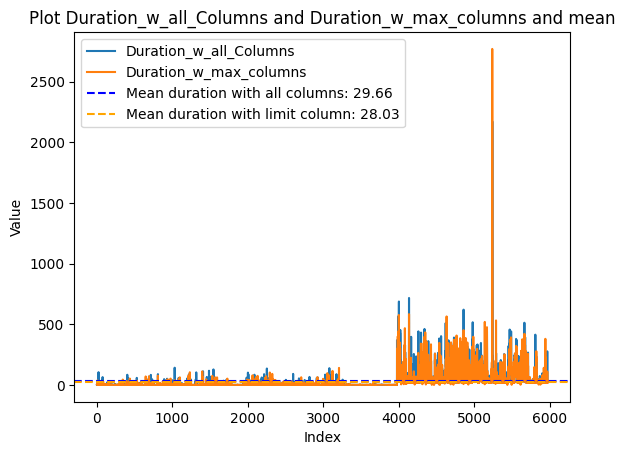

In [22]:
#lascia il tempo che trova
mean_w_all_cols = df_appended['Duration_w_all_Columns'].mean()
mean_w_max_cols = df_appended['Duration_w_max_columns'].mean()

plt.plot(df_appended.index, df_appended['Duration_w_all_Columns'], label='Duration_w_all_Columns')
plt.plot(df_appended.index, df_appended['Duration_w_max_columns'], label='Duration_w_max_columns')

plt.axhline(y=mean_w_all_cols, color='blue', linestyle='--', label=f'Mean duration with all columns: {mean_w_all_cols:.2f}')
plt.axhline(y=mean_w_max_cols, color='orange', linestyle='--', label=f'Mean duration with limit column: {mean_w_max_cols:.2f}')

plt.title('Plot Duration_w_all_Columns and Duration_w_max_columns and mean')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')

plt.show()

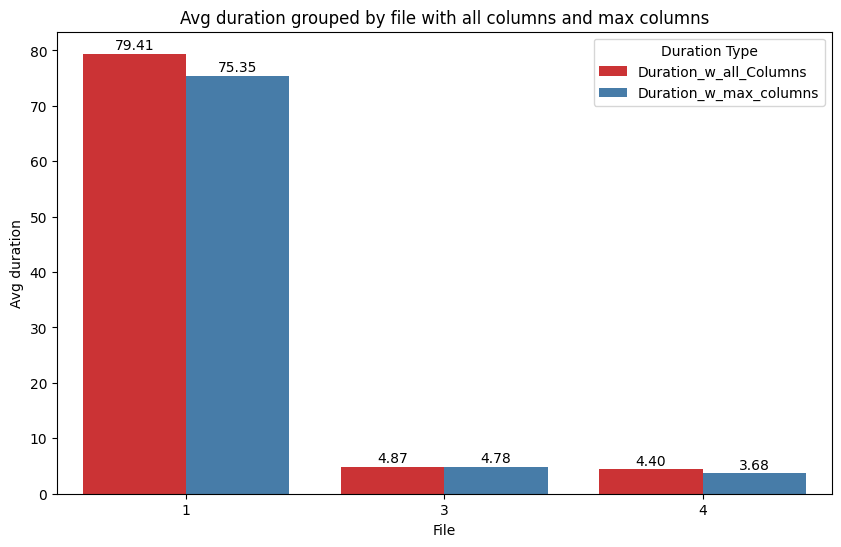

In [23]:

grouped_means = df_appended.groupby('File').agg({
    'Duration_w_all_Columns': 'mean',
    'Duration_w_max_columns': 'mean'
}).reset_index()

grouped_means_melted = grouped_means.melt(id_vars='File', 
                                          value_vars=['Duration_w_all_Columns', 'Duration_w_max_columns'], 
                                          var_name='Durata_Type', value_name='Mean')

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=grouped_means_melted, x='File', y='Mean', hue='Durata_Type', palette='Set1')
plt.title('Avg duration grouped by file with all columns and max columns')
plt.xlabel('File')
plt.ylabel('Avg duration')

plt.legend(title='Duration Type')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 1), 
                        textcoords='offset points')

plt.show()

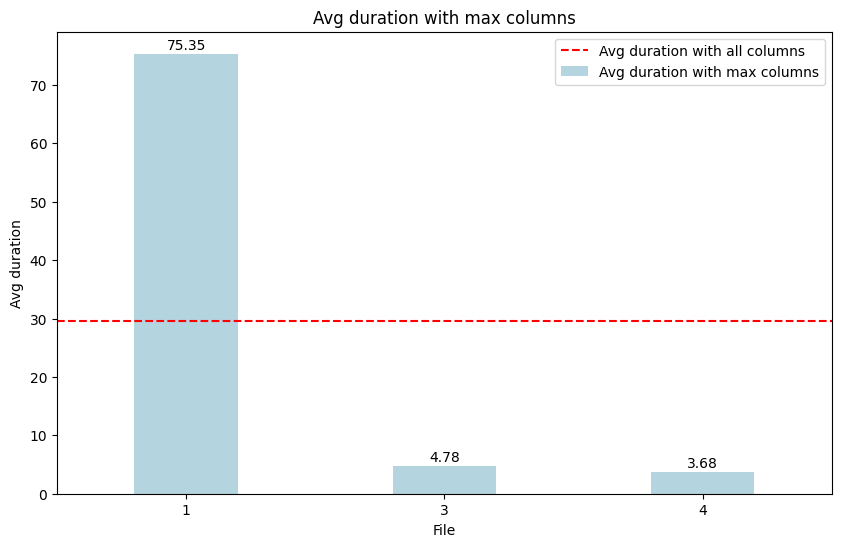

In [24]:
mean_w_all_cols = df_appended['Duration_w_all_Columns'].mean()

grouped_means = df_appended.groupby('File').agg({
    'Duration_w_max_columns': 'mean'
}).reset_index()

grouped_means['Mean_Global'] = mean_w_all_cols

plt.figure(figsize=(10, 6))
plt.axhline(y=mean_w_all_cols, color='red', linestyle='--', label='Avg duration with all columns')
barplot = sns.barplot(data=grouped_means, x='File', y='Duration_w_max_columns', color='lightblue', width=0.4, label='Avg duration with max columns')

plt.title('Avg duration with max columns')
plt.xlabel('File')
plt.ylabel('Avg duration')
plt.xticks(ticks=range(len(grouped_means)), labels=grouped_means['File'], rotation=0)  # Modifica rotation se necessarioplt.legend()
plt.legend(loc='upper right')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     xytext=(0, 1), 
                     textcoords='offset points')

plt.show()

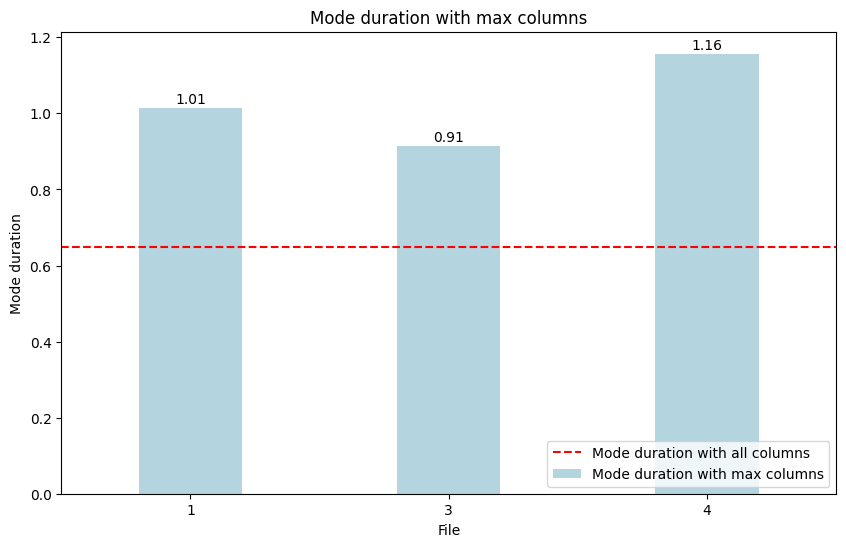

In [35]:
mode_w_all_cols = df_appended['Duration_w_all_Columns'].mode().iloc[0] if not df_appended['Duration_w_all_Columns'].mode().empty else None

grouped_modes = df_appended.groupby('File').agg({
    'Duration_w_max_columns': lambda x: x.mode().iloc[0] if not x.mode().empty else None
}).reset_index()

grouped_modes['Mode_Global'] = mode_w_all_cols

plt.figure(figsize=(10, 6))

plt.axhline(y=mode_w_all_cols, color='red', linestyle='--', label='Mode duration with all columns')
barplot = sns.barplot(data=grouped_modes, x='File', y='Duration_w_max_columns', color='lightblue', width=0.4, label='Mode duration with max columns')
plt.title('Mode duration with max columns')
plt.xlabel('File')
plt.ylabel('Mode duration')
plt.xticks(ticks=range(len(grouped_modes)), labels=grouped_modes['File'], rotation=0)

plt.legend(loc='lower right')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     xytext=(0, 1), 
                     textcoords='offset points')

plt.show()


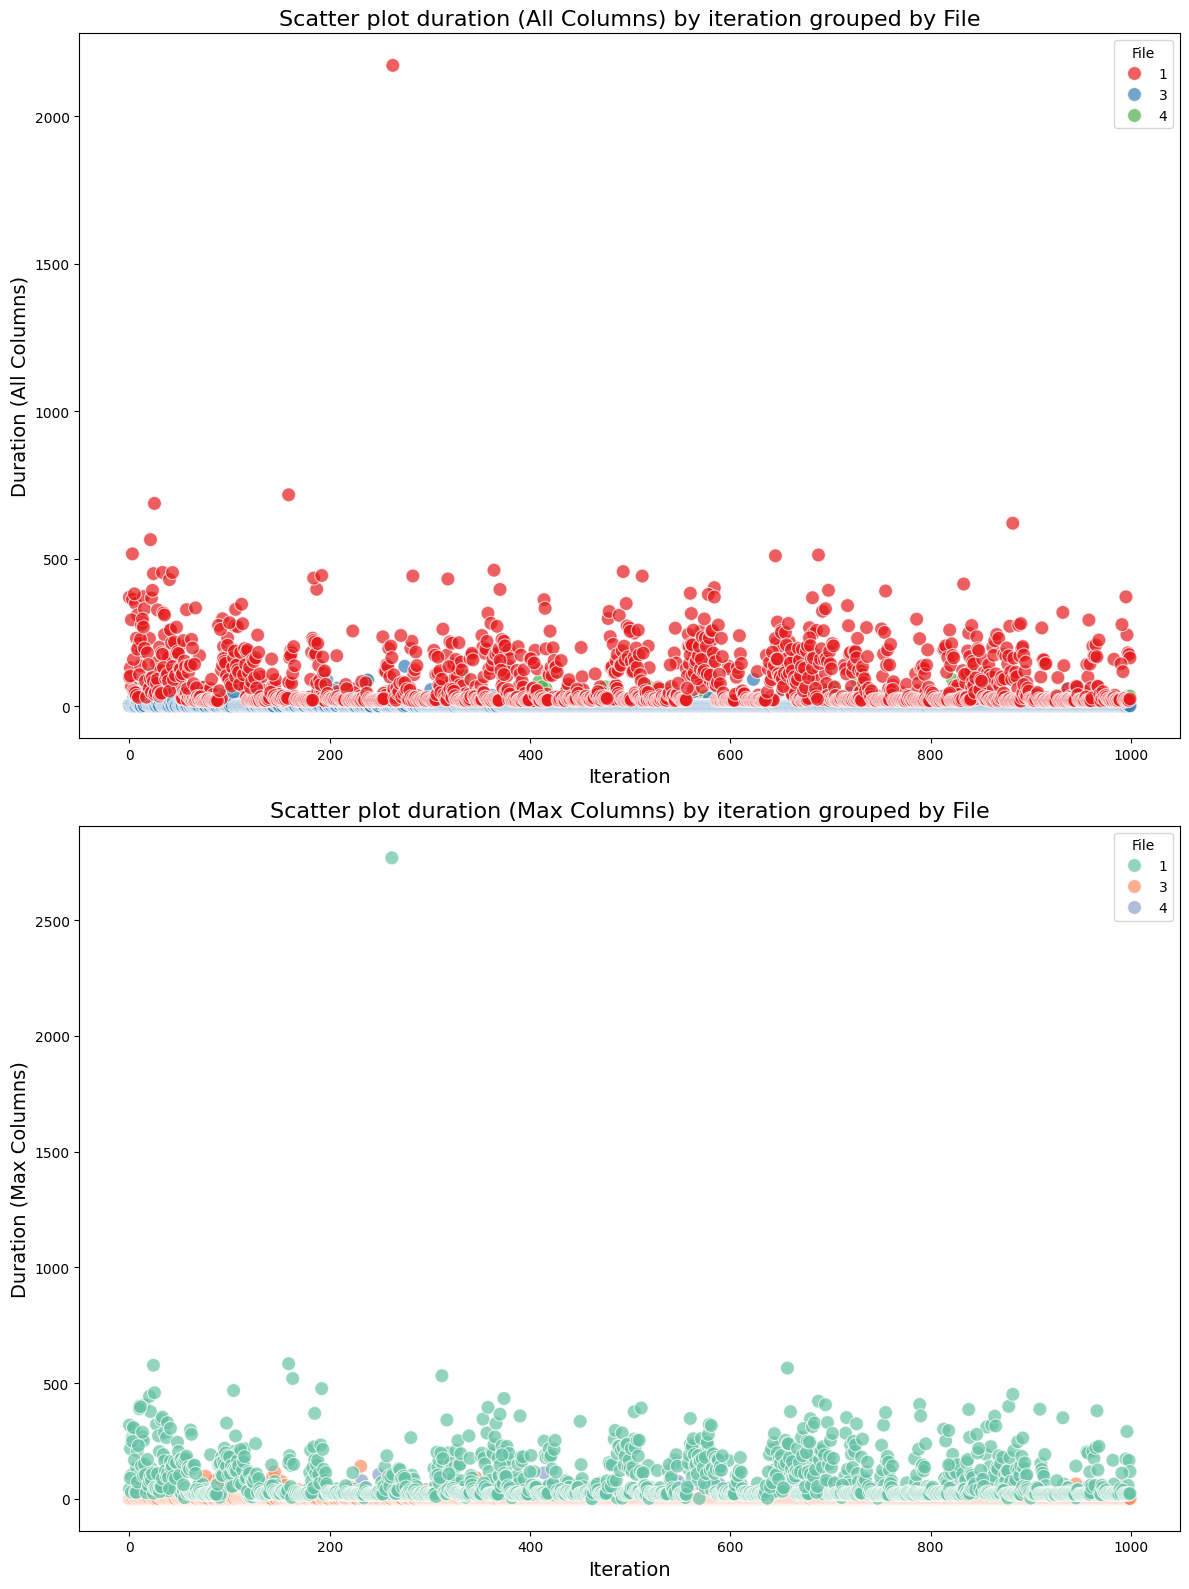

In [26]:
#2 rows 1 column
fig, ax = plt.subplots(2, 1, figsize=(12, 16))  

#scatter plot Duration_w_all_Columns
sns.scatterplot(data=df_appended, x='Iteration', y='Duration_w_all_Columns', hue='File', palette='Set1', s=100, alpha=0.7, ax=ax[0])
ax[0].set_title('Scatter plot duration (All Columns) by iteration grouped by File', fontsize=16)
ax[0].set_xlabel('Iteration', fontsize=14)
ax[0].set_ylabel('Duration (All Columns)', fontsize=14)

#scatter plot Duration_w_max_columns
sns.scatterplot(data=df_appended, x='Iteration', y='Duration_w_max_columns', hue='File', palette='Set2', s=100, alpha=0.7, ax=ax[1])
ax[1].set_title('Scatter plot duration (Max Columns) by iteration grouped by File', fontsize=16)
ax[1].set_xlabel('Iteration', fontsize=14)
ax[1].set_ylabel('Duration (Max Columns)', fontsize=14)

plt.legend(title='File')
plt.tight_layout()
plt.show()


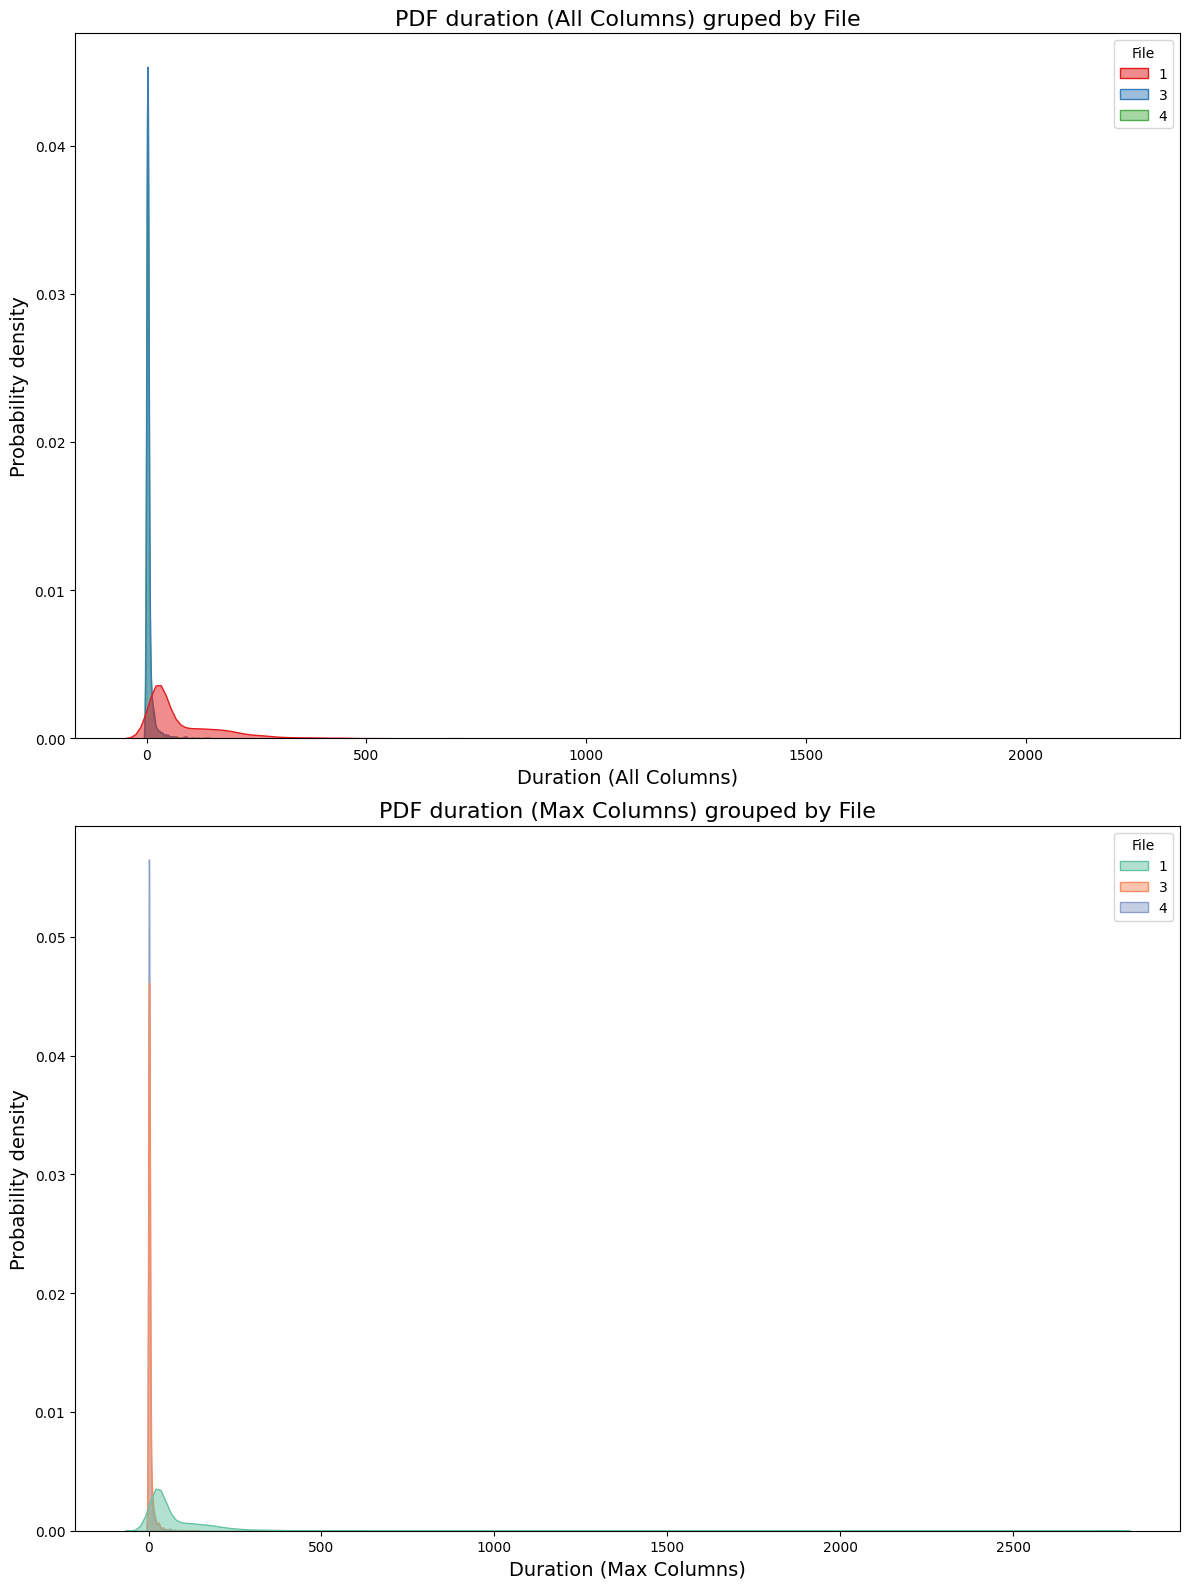

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(12, 16)) 

#PDF Duration_w_all_Columns grouped by File
sns.kdeplot(data=df_appended, x='Duration_w_all_Columns', hue='File', fill=True, palette='Set1', alpha=0.5, ax=ax[0])
ax[0].set_title('PDF duration (All Columns) gruped by File', fontsize=16)
ax[0].set_xlabel('Duration (All Columns)', fontsize=14)
ax[0].set_ylabel('Probability density', fontsize=14)

#PDF Duration_w_max_columns grouped by File
sns.kdeplot(data=df_appended, x='Duration_w_max_columns', hue='File', fill=True, palette='Set2', alpha=0.5, ax=ax[1])
ax[1].set_title('PDF duration (Max Columns) grouped by File', fontsize=16)
ax[1].set_xlabel('Duration (Max Columns)', fontsize=14)
ax[1].set_ylabel('Probability density', fontsize=14)

plt.tight_layout()
plt.show()


File          Round     Iteration             3             4
count  16800.000000  16800.000000  16800.000000  16800.000000
mean      57.434464     99.486071     38.519164     37.914175
std       24.358402     57.714414     66.362209     62.369299
min       10.000000      0.000000      0.733732      0.703787
25%       36.750000     49.000000      5.439302      5.255632
50%       57.500000    100.000000     14.595062     14.090366
75%       78.250000    149.000000     41.039282     40.650350
max       99.000000    199.000000   3819.760530   2698.781736
File          Round     Iteration             3             4
count  16800.000000  16800.000000  16800.000000  16800.000000
mean      57.434464     99.486071     34.577882     36.854853
std       24.358402     57.714414     54.484517     58.473680
min       10.000000      0.000000      0.668406      1.271452
25%       36.750000     49.000000      4.893795      6.306942
50%       57.500000    100.000000     12.926749     12.841291
75%     

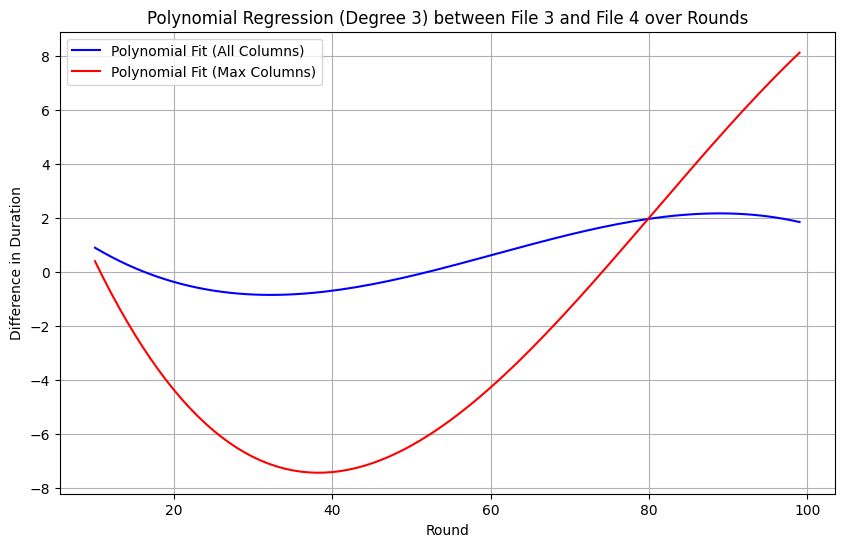

In [29]:
#pivot --> file 3 and 4 as columns for durations with all columns and max columns
pivot_all_columns = df5.pivot(index=['Round', 'Iteration'], columns='File', values='Duration_w_all_Columns').reset_index()
pivot_max_columns = df5.pivot(index=['Round', 'Iteration'], columns='File', values='Duration_w_max_columns').reset_index()
pivot_all_columns.dropna(subset=[3, 4], inplace=True)
pivot_max_columns.dropna(subset=[3, 4], inplace=True)
print(pivot_all_columns.describe())
print(pivot_max_columns.describe())
pivot_all_columns['diff_3_4_all_columns'] = pivot_all_columns[3] - pivot_all_columns[4]
pivot_max_columns['diff_3_4_max_columns'] = pivot_max_columns[3] - pivot_max_columns[4]

#polynomial degree 3 model regression for All columns. x_all indipendent variable (time/round)
X_all = pivot_all_columns['Round'].values
y_all = pivot_all_columns['diff_3_4_all_columns'].values
coeffs_all = np.polyfit(X_all, y_all, 3)
y_pred_all = np.polyval(coeffs_all, X_all)

X_max = pivot_max_columns['Round'].values
y_max = pivot_max_columns['diff_3_4_max_columns'].values
coeffs_max = np.polyfit(X_max, y_max, 3)
y_pred_max = np.polyval(coeffs_max, X_max)

plt.figure(figsize=(10, 6))
#polynomial curve for All Columns
plt.plot(X_all, y_pred_all, color='b', linestyle='-', label='Polynomial Fit (All Columns)')
#polynomial curve for Max Columns
plt.plot(X_max, y_pred_max, color='r', linestyle='-', label='Polynomial Fit (Max Columns)')

plt.title('Polynomial Regression (Degree 3) between File 3 and File 4 over Rounds')
plt.xlabel('Round')
plt.ylabel('Difference in Duration')
plt.legend()
plt.grid(True)
plt.show()


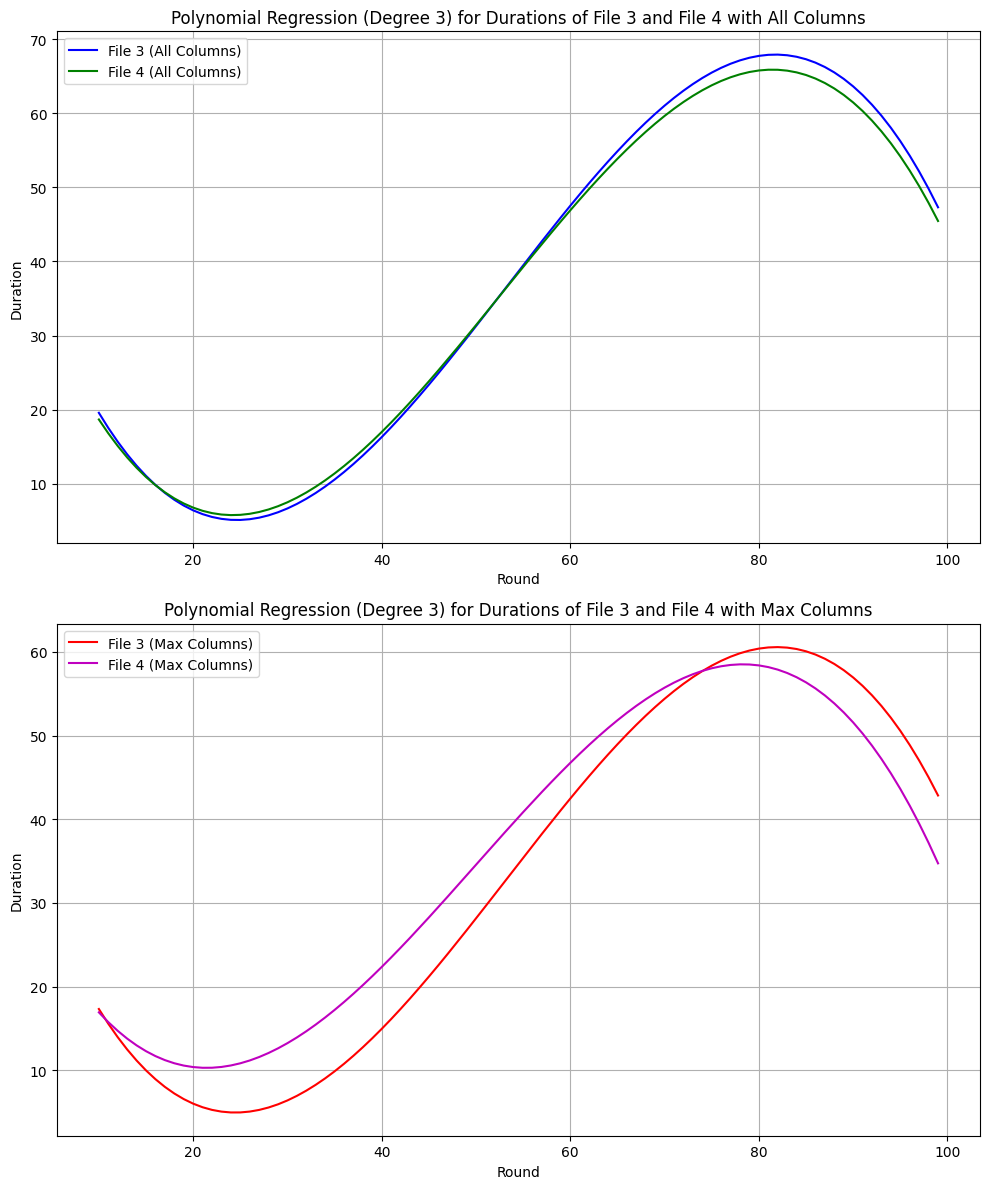

In [30]:
pivot_all_columns = df5.pivot(index=['Round', 'Iteration'], columns='File', values='Duration_w_all_Columns').reset_index()
pivot_max_columns = df5.pivot(index=['Round', 'Iteration'], columns='File', values='Duration_w_max_columns').reset_index()
pivot_all_columns.dropna(subset=[3, 4], inplace=True)
pivot_max_columns.dropna(subset=[3, 4], inplace=True)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

#first graph with all columns
X_all = pivot_all_columns['Round'].values
y_file_3_all = pivot_all_columns[3].values
y_file_4_all = pivot_all_columns[4].values

#polynomial regression File 3 with all columns
coeffs_file_3_all = np.polyfit(X_all, y_file_3_all, 3)
y_pred_file_3_all = np.polyval(coeffs_file_3_all, X_all)

#polynomial regression File 4 with all columns
coeffs_file_4_all = np.polyfit(X_all, y_file_4_all, 3)
y_pred_file_4_all = np.polyval(coeffs_file_4_all, X_all)

axs[0].plot(X_all, y_pred_file_3_all, color='b', linestyle='-', label='File 3 (All Columns)')
axs[0].plot(X_all, y_pred_file_4_all, color='g', linestyle='-', label='File 4 (All Columns)')
axs[0].set_title('Polynomial Regression (Degree 3) for Durations of File 3 and File 4 with All Columns')
axs[0].set_xlabel('Round')
axs[0].set_ylabel('Duration')
axs[0].legend()
axs[0].grid(True)

#second graph with max columns
X_max = pivot_max_columns['Round'].values
y_file_3_max = pivot_max_columns[3].values
y_file_4_max = pivot_max_columns[4].values

#polynomial regression File 3 with max columns
coeffs_file_3_max = np.polyfit(X_max, y_file_3_max, 3)
y_pred_file_3_max = np.polyval(coeffs_file_3_max, X_max)

#polynomial regression File 4 with max columns
coeffs_file_4_max = np.polyfit(X_max, y_file_4_max, 3)
y_pred_file_4_max = np.polyval(coeffs_file_4_max, X_max)

axs[1].plot(X_max, y_pred_file_3_max, color='r', linestyle='-', label='File 3 (Max Columns)')
axs[1].plot(X_max, y_pred_file_4_max, color='m', linestyle='-', label='File 4 (Max Columns)')
axs[1].set_title('Polynomial Regression (Degree 3) for Durations of File 3 and File 4 with Max Columns')
axs[1].set_xlabel('Round')
axs[1].set_ylabel('Duration')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

File          Round     Iteration             3             4
count  16792.000000  16792.000000  16792.000000  16792.000000
mean      57.454443     99.551036     23.456681     10.381040
std       24.346734     57.748049     39.383365     21.173313
min       10.000000      0.000000      0.376322      0.317736
25%       37.000000     50.000000      4.950249      2.370119
50%       58.000000     99.500000      9.850650      3.749813
75%       79.000000    150.000000     19.451859      7.508290
max       99.000000    199.000000    620.662562    464.710375
File          Round     Iteration             3             4
count  16792.000000  16792.000000  16792.000000  16792.000000
mean      57.454443     99.551036     23.292416     10.022651
std       24.346734     57.748049     38.515069     20.318097
min       10.000000      0.000000      0.374036      0.301031
25%       37.000000     50.000000      4.877364      2.385377
50%       58.000000     99.500000      9.873919      3.736799
75%     

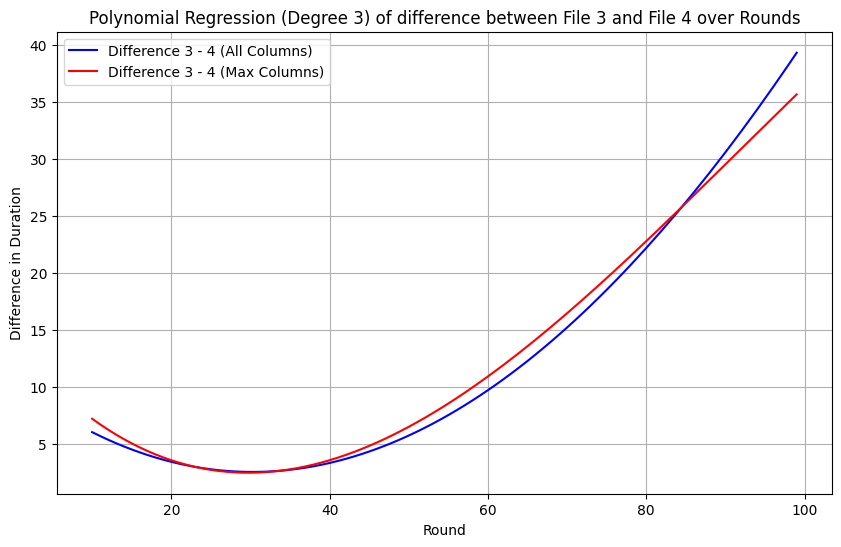

In [47]:
#pivot --> file 3 and 4 as columns for durations with all columns and max columns
pivot_all_columns = df7.pivot(index=['Round', 'Iteration'], columns='File', values='Duration_w_all_Columns').reset_index()
pivot_max_columns = df7.pivot(index=['Round', 'Iteration'], columns='File', values='Duration_w_max_columns').reset_index()
pivot_all_columns.dropna(subset=[3, 4], inplace=True)
pivot_max_columns.dropna(subset=[3, 4], inplace=True)
print(pivot_all_columns.describe())
print(pivot_max_columns.describe())
pivot_all_columns['diff_3_4_all_columns'] = pivot_all_columns[3] - pivot_all_columns[4]
pivot_max_columns['diff_3_4_max_columns'] = pivot_max_columns[3] - pivot_max_columns[4]

#polynomial degree 3 model regression for All columns. x_all indipendent variable (time/round)
X_all = pivot_all_columns['Round'].values
y_all = pivot_all_columns['diff_3_4_all_columns'].values
coeffs_all = np.polyfit(X_all, y_all, 3)
y_pred_all = np.polyval(coeffs_all, X_all)

X_max = pivot_max_columns['Round'].values
y_max = pivot_max_columns['diff_3_4_max_columns'].values
coeffs_max = np.polyfit(X_max, y_max, 3)
y_pred_max = np.polyval(coeffs_max, X_max)

plt.figure(figsize=(10, 6))
#polynomial curve for All Columns
plt.plot(X_all, y_pred_all, color='b', linestyle='-', label='Difference 3 - 4 (All Columns)')
#polynomial curve for Max Columns
plt.plot(X_max, y_pred_max, color='r', linestyle='-', label='Difference 3 - 4 (Max Columns)')

plt.title('Polynomial Regression (Degree 3) of difference between File 3 and File 4 over Rounds')
plt.xlabel('Round')
plt.ylabel('Difference in Duration')
plt.legend()
plt.grid(True)
plt.show()
#IT CAN BE OBSERVED THAT THEY DIFFER BY A FACTOR OF APPROXIMATELY N LOG N

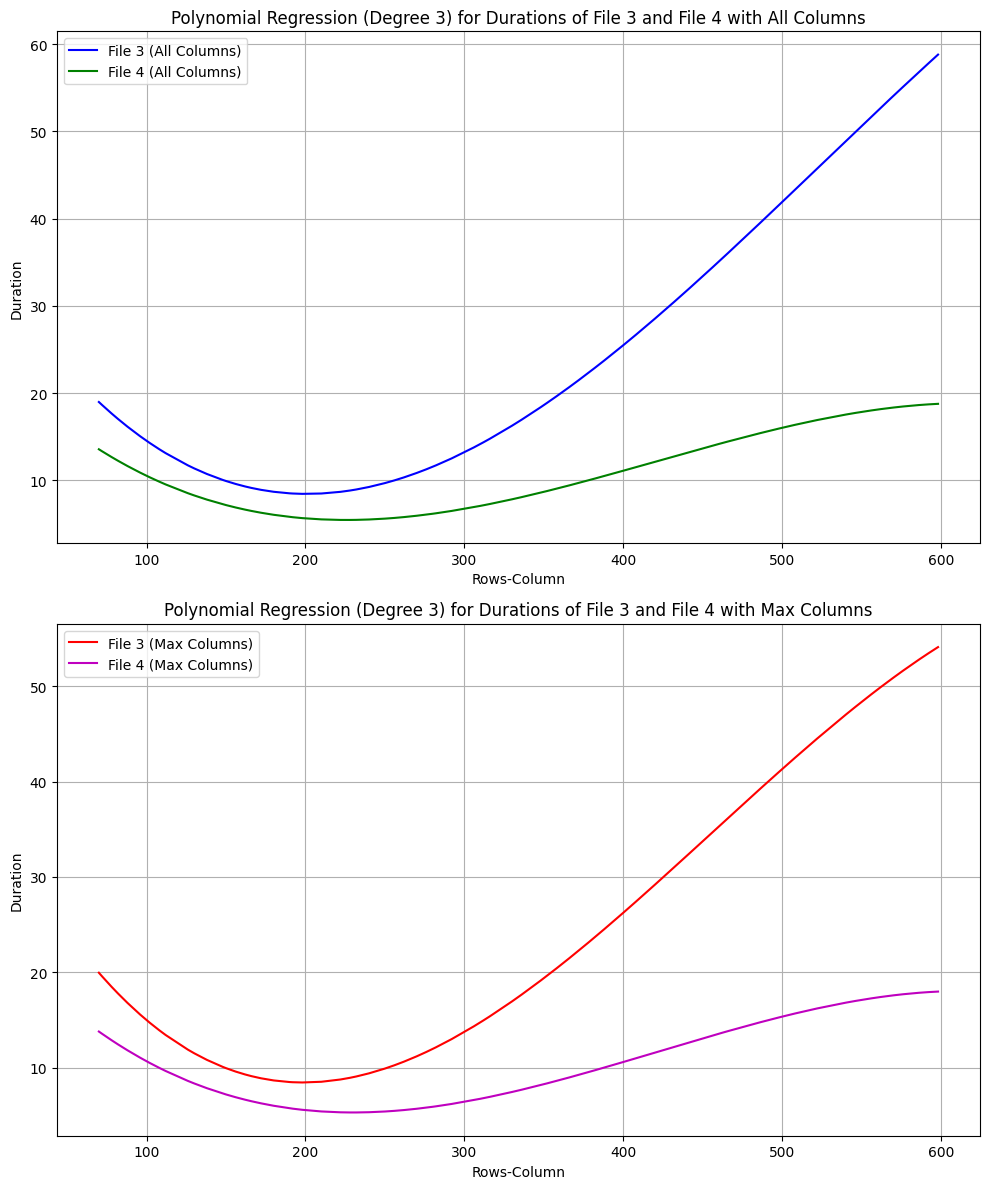

In [34]:
pivot_all_columns = df7.pivot(index=['Rows-Column', 'Iteration'], columns='File', values='Duration_w_all_Columns').reset_index()
pivot_max_columns = df7.pivot(index=['Rows-Column', 'Iteration'], columns='File', values='Duration_w_max_columns').reset_index()
pivot_all_columns.dropna(subset=[3, 4], inplace=True)
pivot_max_columns.dropna(subset=[3, 4], inplace=True)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

#first graph with all columns
X_all = pivot_all_columns['Rows-Column'].values
y_file_3_all = pivot_all_columns[3].values
y_file_4_all = pivot_all_columns[4].values

#polynomial regression File 3 with all columns
coeffs_file_3_all = np.polyfit(X_all, y_file_3_all, 3)
y_pred_file_3_all = np.polyval(coeffs_file_3_all, X_all)

#polynomial regression File 4 with all columns
coeffs_file_4_all = np.polyfit(X_all, y_file_4_all, 3)
y_pred_file_4_all = np.polyval(coeffs_file_4_all, X_all)

axs[0].plot(X_all, y_pred_file_3_all, color='b', linestyle='-', label='File 3 (All Columns)')
axs[0].plot(X_all, y_pred_file_4_all, color='g', linestyle='-', label='File 4 (All Columns)')
axs[0].set_title('Polynomial Regression (Degree 3) for Durations of File 3 and File 4 with All Columns')
axs[0].set_xlabel('Rows-Column')
axs[0].set_ylabel('Duration')
axs[0].legend()
axs[0].grid(True)

#second graph with max columns
X_max = pivot_max_columns['Rows-Column'].values
y_file_3_max = pivot_max_columns[3].values
y_file_4_max = pivot_max_columns[4].values

#polynomial regression File 3 with max columns
coeffs_file_3_max = np.polyfit(X_max, y_file_3_max, 3)
y_pred_file_3_max = np.polyval(coeffs_file_3_max, X_max)

#polynomial regression File 4 with max columns
coeffs_file_4_max = np.polyfit(X_max, y_file_4_max, 3)
y_pred_file_4_max = np.polyval(coeffs_file_4_max, X_max)

axs[1].plot(X_max, y_pred_file_3_max, color='r', linestyle='-', label='File 3 (Max Columns)')
axs[1].plot(X_max, y_pred_file_4_max, color='m', linestyle='-', label='File 4 (Max Columns)')
axs[1].set_title('Polynomial Regression (Degree 3) for Durations of File 3 and File 4 with Max Columns')
axs[1].set_xlabel('Rows-Column')
axs[1].set_ylabel('Duration')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()